In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import NEMtropy as nem
import numpy as np

In [2]:
# Load the datasets from the assignment_1_data folder
path = "NYSE/"
npy_files = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith(".npy")]
numpy_files = [np.load(path + f) for f in npy_files]

correlation_matrices = {k: v for k, v in zip(npy_files, numpy_files)}
stocknames = {i:ticker for i, ticker in enumerate(np.loadtxt(path + "stocknames.txt", dtype=str))}

In [3]:
def calc_first_two_eigvals(correlation_matrix):
    """
    Calculates the first two eigenvalues of a correlation matrix
    :param correlation_matrix: The correlation matrix
    :return: The first two eigenvalues
    """
    eigenvalues, _ = np.linalg.eig(correlation_matrix)
    return eigenvalues[0], eigenvalues[1]

In [4]:
eigvals_gap = {}

for k, v in correlation_matrices.items():
    first, second = calc_first_two_eigvals(v)
    eigvals_gap[k] = first - second
    print("The eigenvalue gap for {} is {}".format(k, first - second))


The eigenvalue gap for cormat_1h.npy is 24.913207558527922
The eigenvalue gap for cormat_1m.npy is 27.0952614306271
The eigenvalue gap for cormat_gaussian_1h.npy is 0.09607470365419424
The eigenvalue gap for cormat_gaussian_1m.npy is 0.2741448549987743
The eigenvalue gap for cormat_onefactor_1h.npy is 20.746547176797552
The eigenvalue gap for cormat_onefactor_1m.npy is 20.79861329982532


In [19]:
mst_degree_distributions = {}
graphs = {}
msts = {}

def create_graph(correlation_matrix, stocknames):
    graph = nx.from_numpy_matrix(correlation_matrix)
    nx.set_node_attributes(graph, values=stocknames, name='ticker')
    return graph

def create_MST(graph):
    return nx.minimum_spanning_tree(graph)

def calc_degree_distribution(graph):
    return dict(nx.degree(graph))

def analyze_mst(graph):
    mst = create_MST(graph)

    # Compute degree distribution
    mst_degree_distribution = calc_degree_distribution(mst)

    # Identify top 5 stocks with highest degree
    top_5_stocks = sorted(mst_degree_distribution.items(), key=lambda x: x[1], reverse=True)[:5]

    return mst_degree_distribution, top_5_stocks

for k, v in correlation_matrices.items():
    # Create graphs from the correlation matrices
    G = create_graph(v, stocknames)
    graphs[k] = G
    # Create MSTs from the graphs
    MST = create_MST(G)
    msts[k] = MST

    # Analyze the MST
    mst_degree_distribution, top_5_stocks = analyze_mst(MST)
    mst_degree_distributions[k] = mst_degree_distribution

    # Print degree distribution and top 5 stocks
    print("Degree distribution for the MST of " + k + ":", mst_degree_distribution)
    print("5 stocks with highest degree for the MST of " + k + ":", [MST.nodes[node[0]]['ticker'] for node in top_5_stocks])

Degree distribution for the MST of cormat_1h.npy: {0: 3, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 11, 13: 13, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 5, 20: 1, 21: 1, 22: 1, 23: 2, 24: 1, 25: 2, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 11, 32: 3, 33: 1, 34: 15, 35: 4, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 2, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 3, 60: 1, 61: 1, 62: 1, 63: 1, 64: 3, 65: 3, 66: 1, 67: 2, 68: 1, 69: 1, 70: 1, 71: 1, 72: 3, 73: 1, 74: 1, 75: 1, 76: 1, 77: 6, 78: 1, 79: 1, 80: 1, 81: 1, 82: 17, 83: 5, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1}
5 stocks with highest degree for the MST of cormat_1h.npy: ['SO', 'EXC', 'BAX', 'BAC', 'EBAY']
Degree distribution for the MST of cormat_1m.npy: {0: 1, 1: 5, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 2, 8: 1, 9: 2, 10: 1, 11: 2, 12: 2, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1,

In [26]:
degree_distributions = {k: calc_degree_distribution(v) for k, v in graphs.items()}

In [43]:
def plot_degree_distribution(degree_distribution, title):
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.hist(degree_distribution.values(), bins=20)
    plt.show()

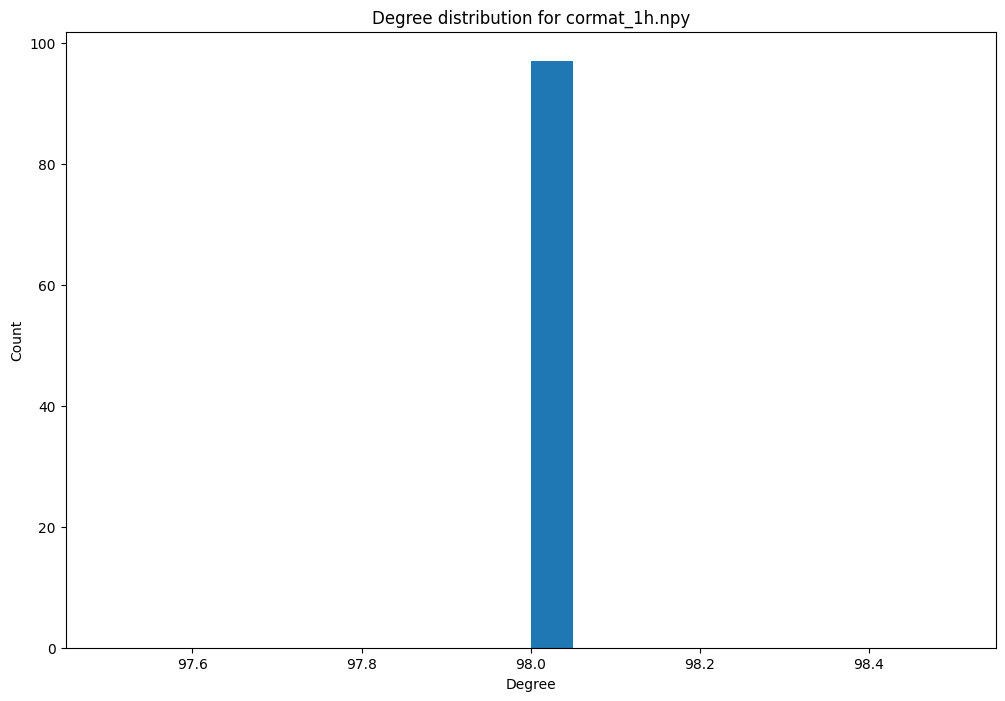

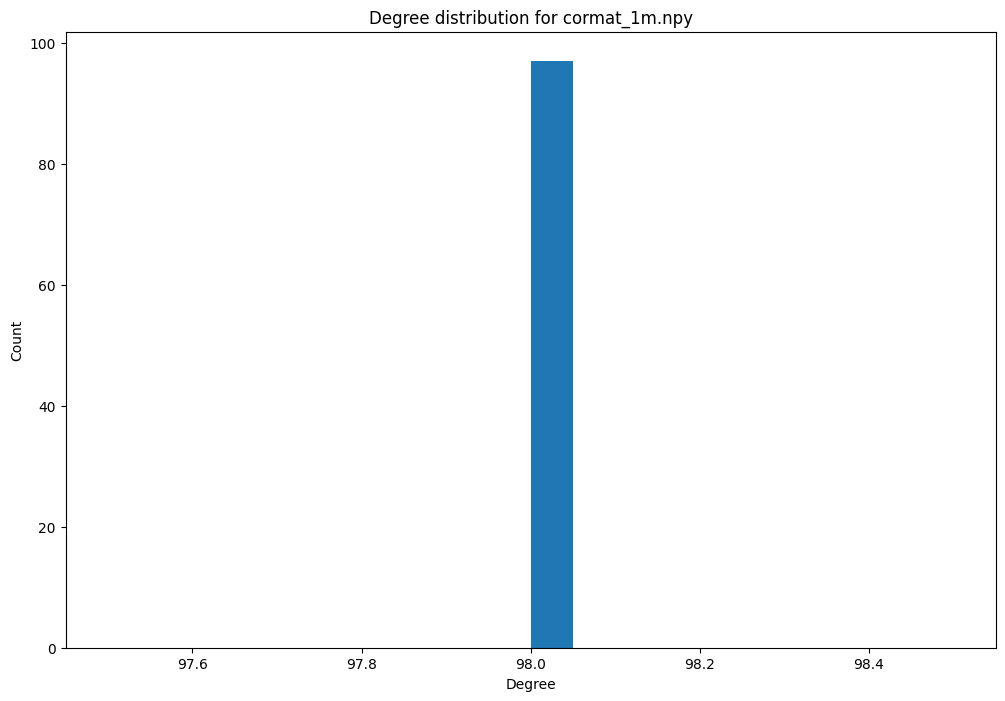

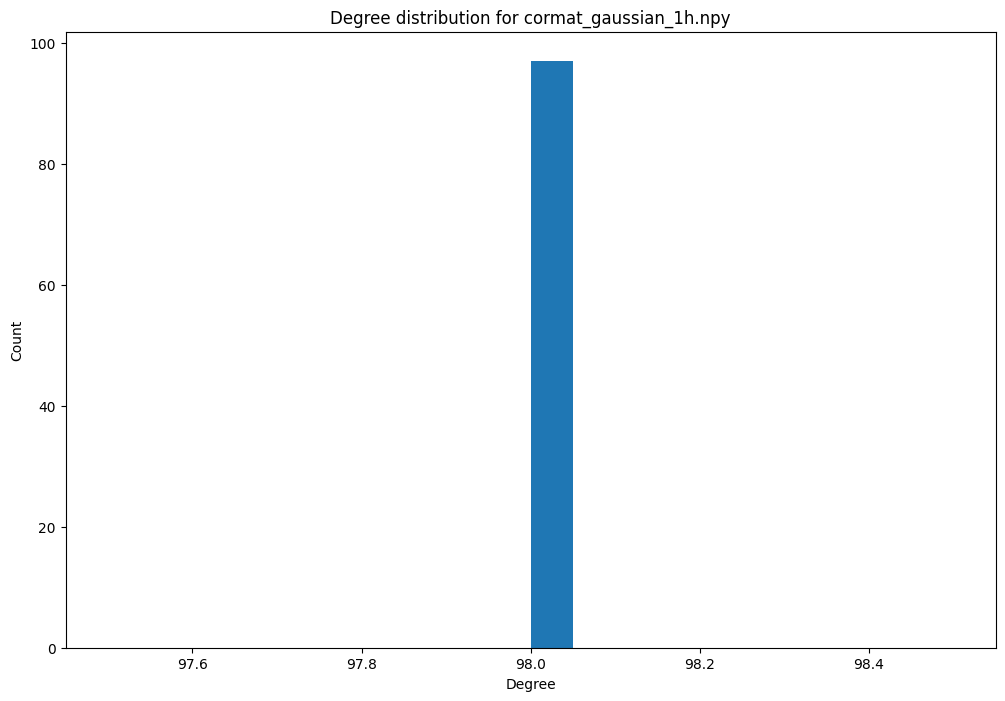

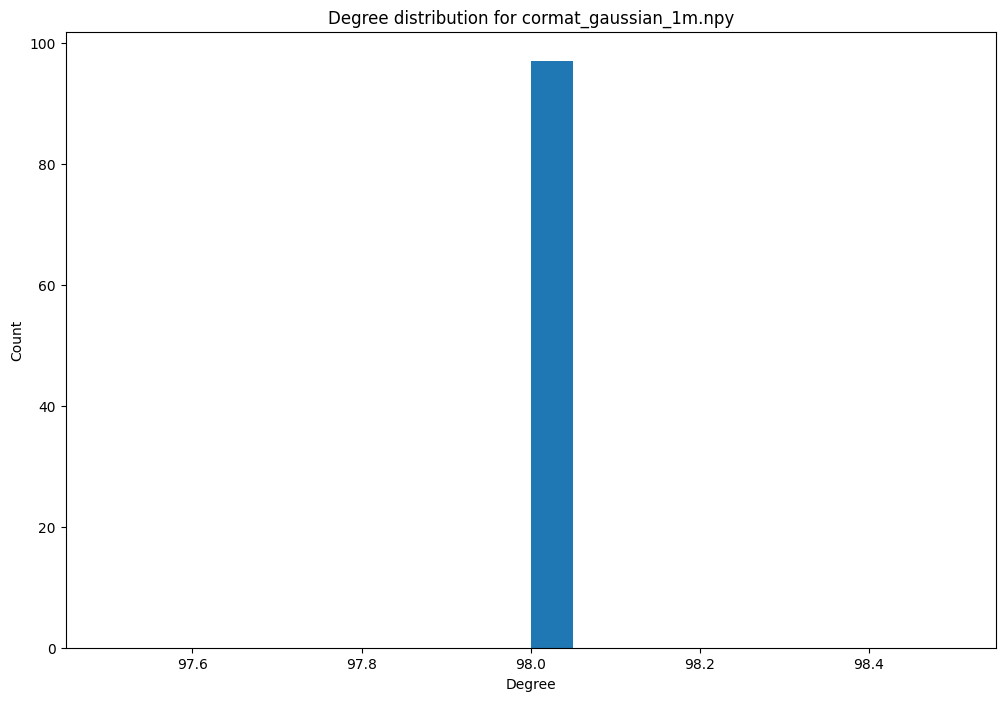

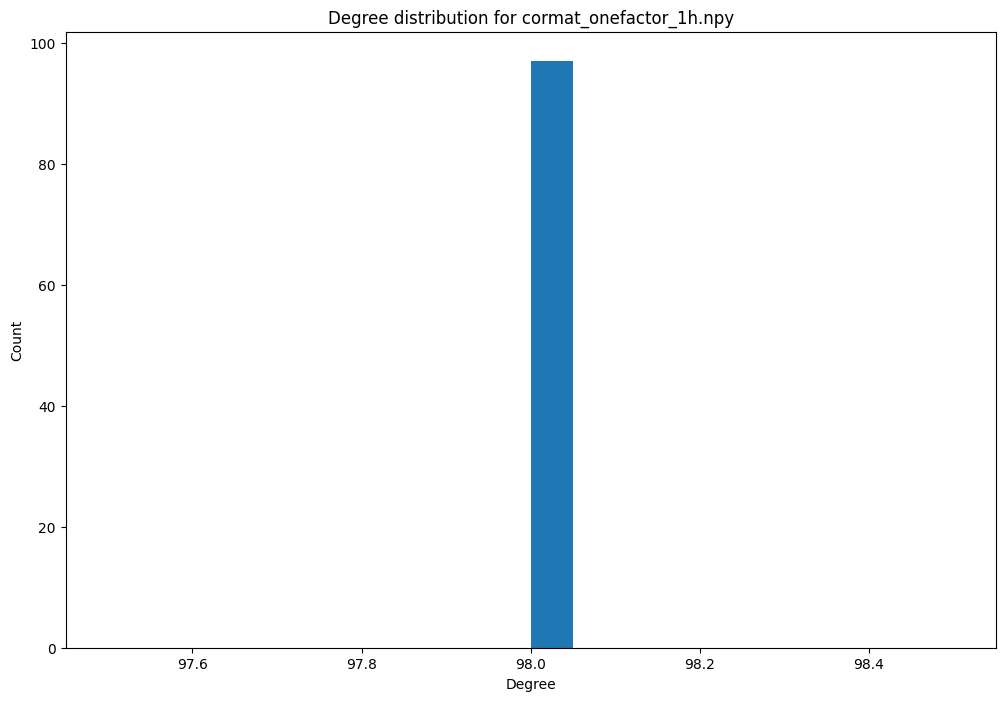

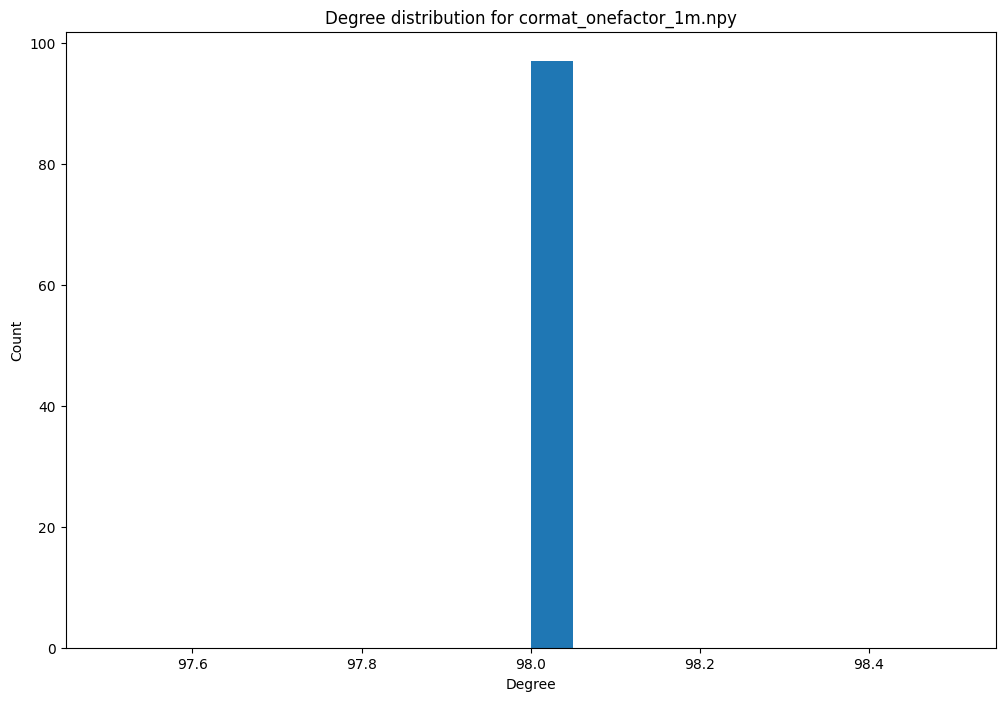

In [45]:
for k, v in degree_distributions.items():
    plot_degree_distribution(v, "Degree distribution for " + k)

In [35]:
def plot_log_log_mst_degree_distribution(G):
    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))
    plt.figure(figsize=(12, 8)) 
    plt.loglog(degrees, degree_freq,'go-') 
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

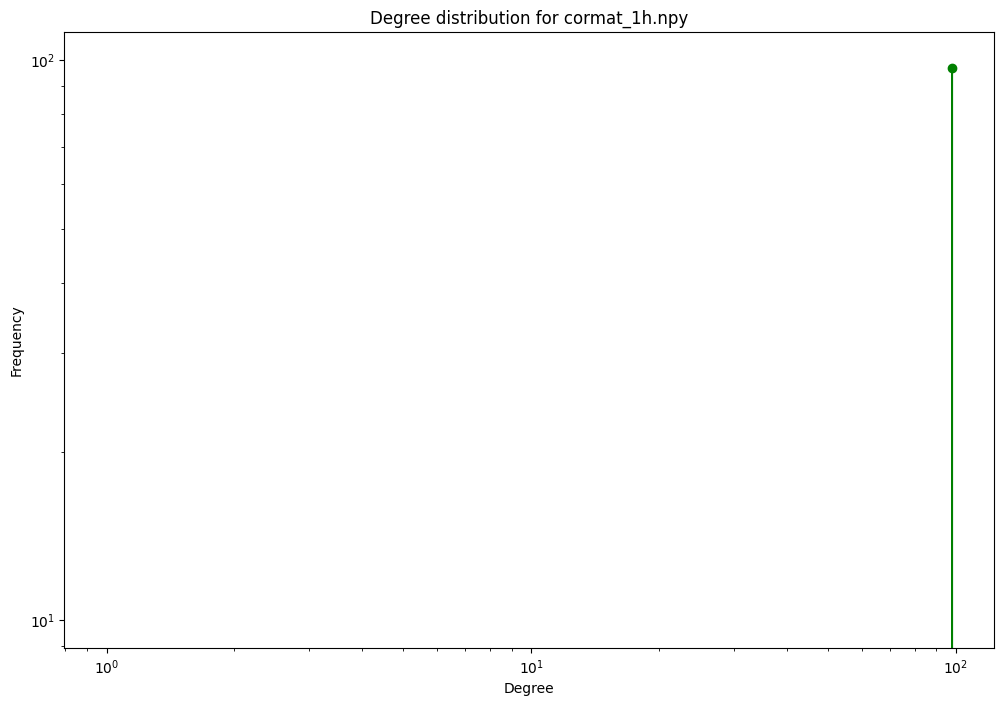

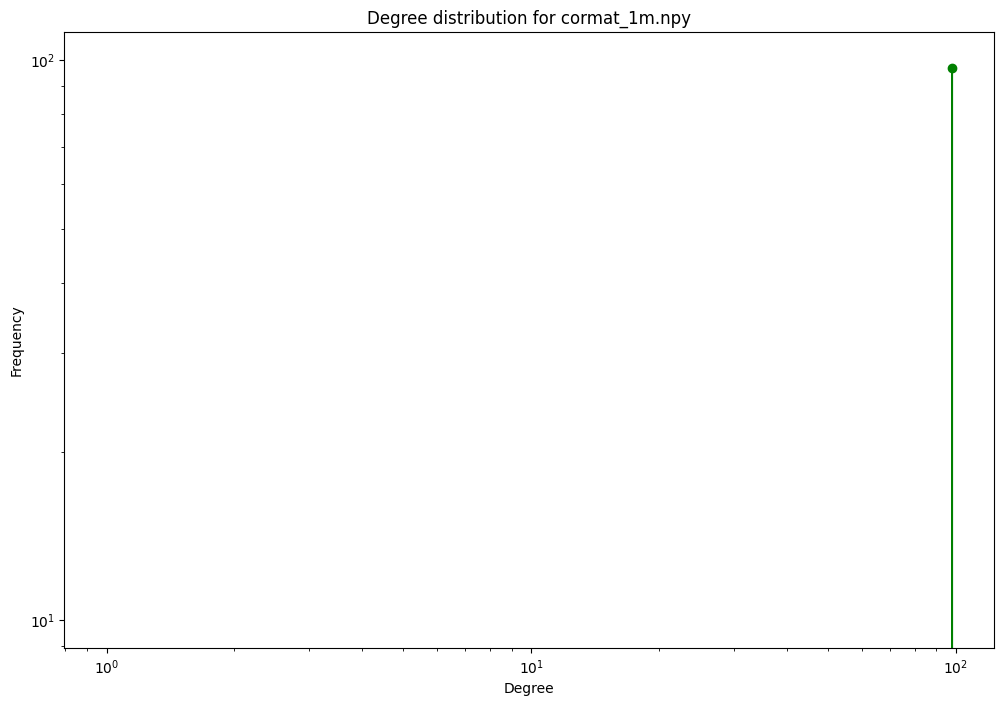

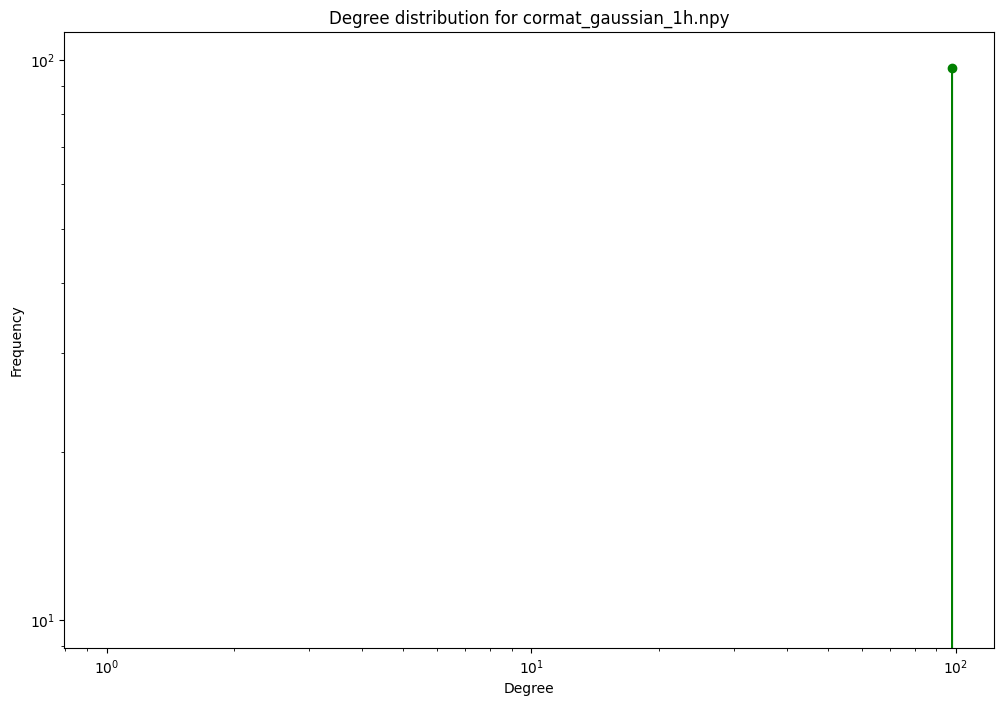

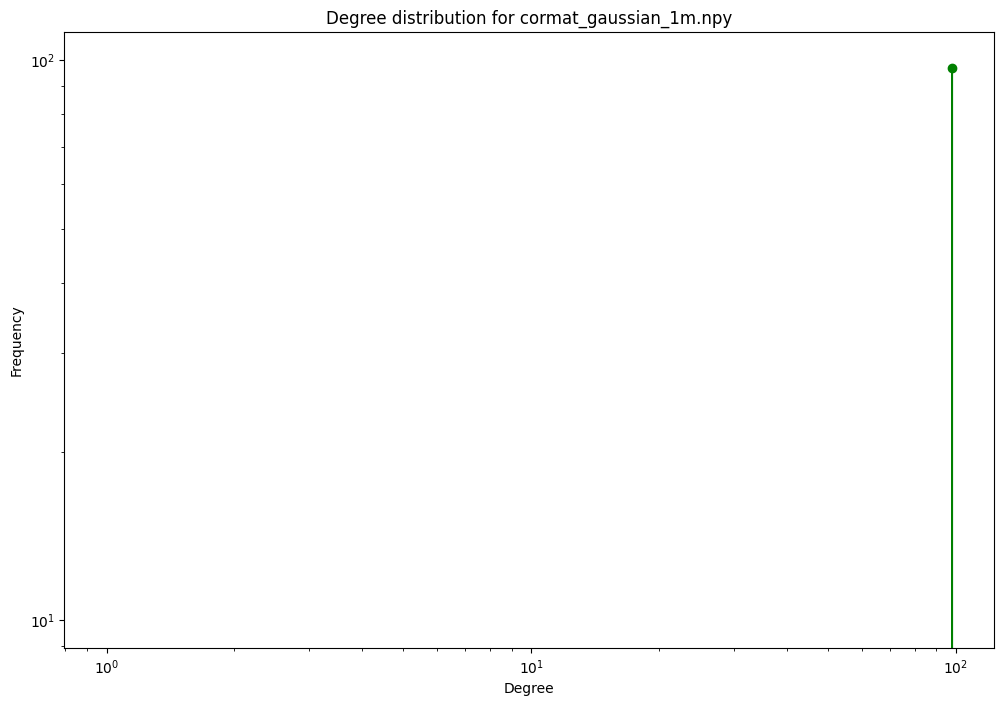

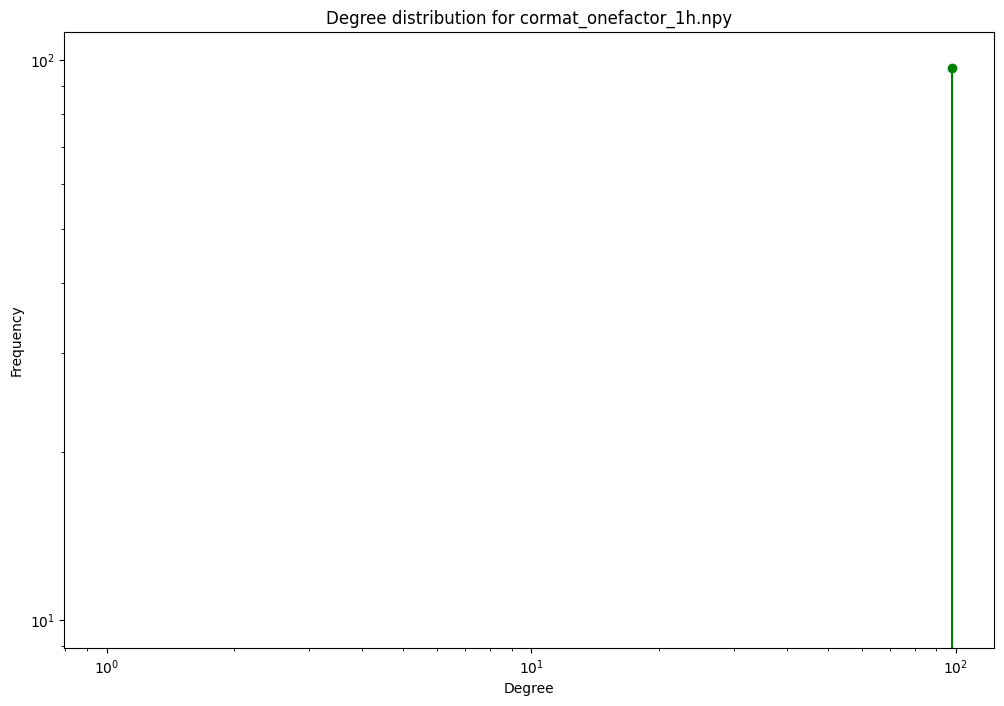

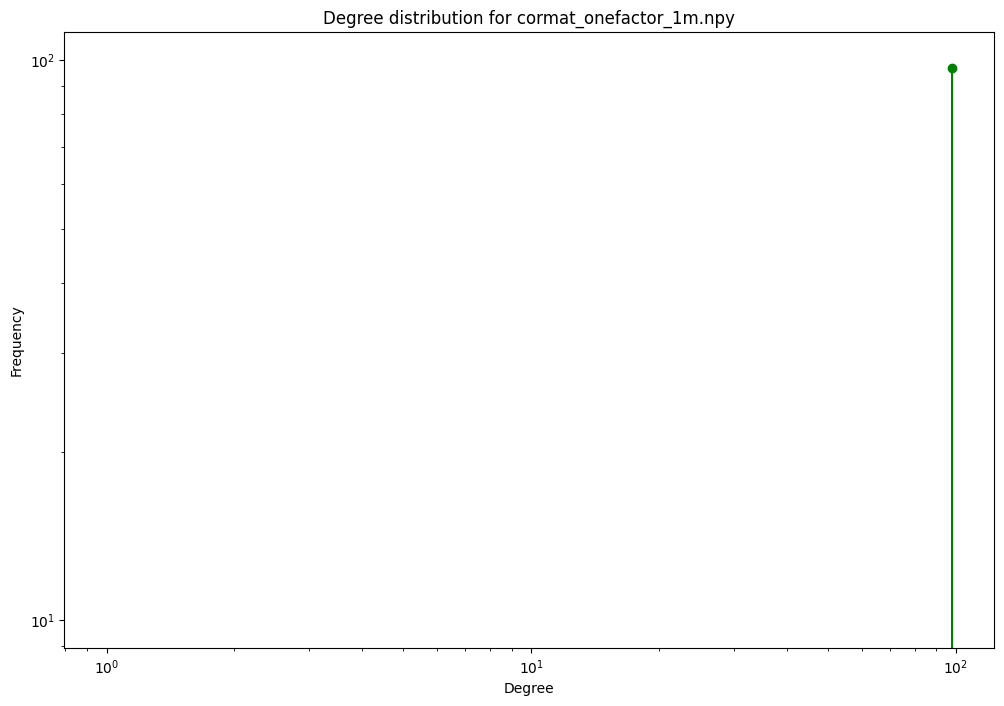

In [36]:
for k, v in graphs.items():
    plot_log_log_mst_degree_distribution(v)
    plt.title("Degree distribution for " + k)
    plt.show()

In [52]:
degree_dists = [[],[]]
labels = ['log-returns', 'Normal', 'One-Factor']
title = 'MST Degree Distributions Comparison'

for k in mst_degree_distributions.keys():
    if "_1m.npy" in k:
        degree_dists[0].append(list(mst_degree_distributions[k].values()))
    elif "_1h.npy" in k:
        degree_dists[1].append(list(mst_degree_distributions[k].values()))

In [53]:
def plot_mst_degree_distributions(degree_dists, labels, title):
    plt.figure(figsize=(10, 6))

    for degree_dist, label in zip(degree_dists, labels):
        bins = np.arange(min(degree_dist), max(degree_dist) + 1.5) - 0.5
        plt.hist(degree_dist, bins=bins, alpha=0.5, label=label, density=True)

    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.show()

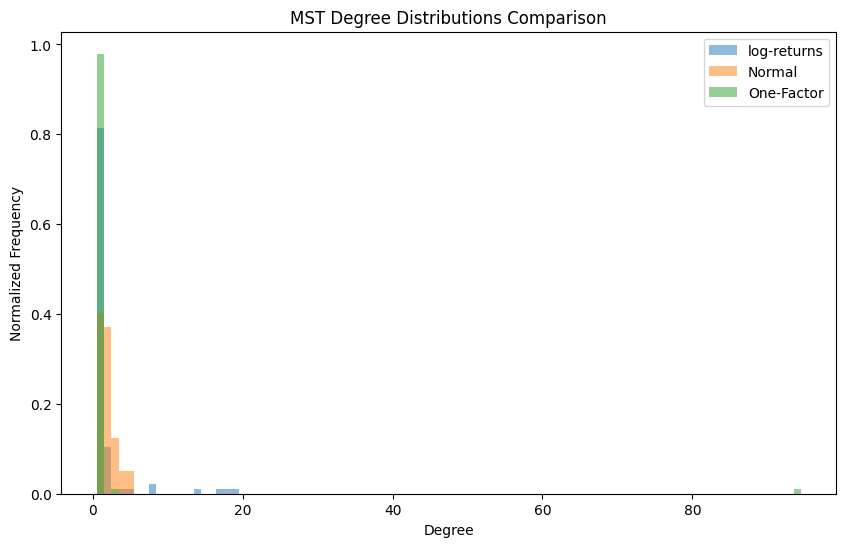

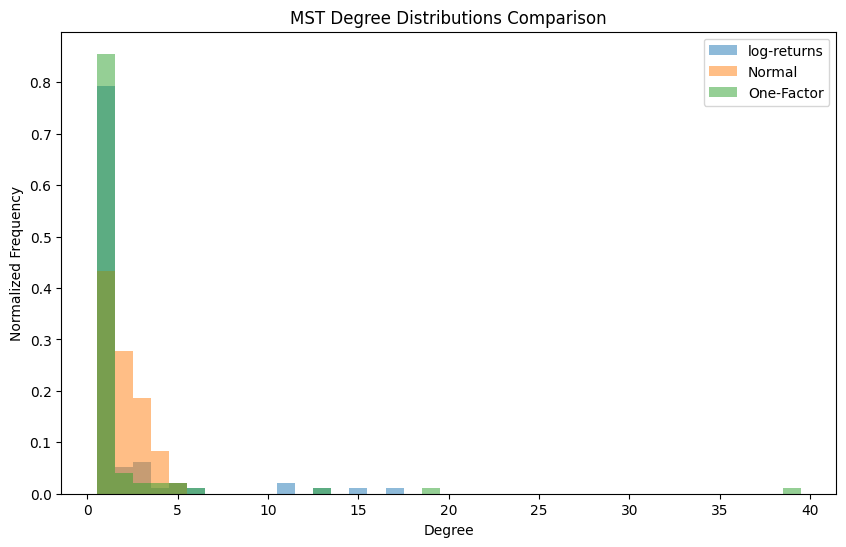

In [54]:
for time_scale in degree_dists:
    plot_mst_degree_distributions(time_scale, labels, title)

In [71]:
def plot_log_log_mst_degree_distribution(degree_dists, labels, title):
    plt.figure(figsize=(10, 6))

    for degree_dist, label in zip(degree_dists, labels):
        degree_freq = nx.degree_histogram(degree_dist)
        degrees = range(len(degree_freq))
        plt.loglog(degrees, degree_freq, marker='o', label=label)

    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [64]:
degree_dists = [[],[]]
labels = ['log-returns', 'Normal', 'One-Factor']
title = 'MST Degree Distributions Comparison'

for k in msts.keys():
    if "_1m.npy" in k:
        degree_dists[0].append(msts[k])
    elif "_1h.npy" in k:
        degree_dists[1].append(msts[k])

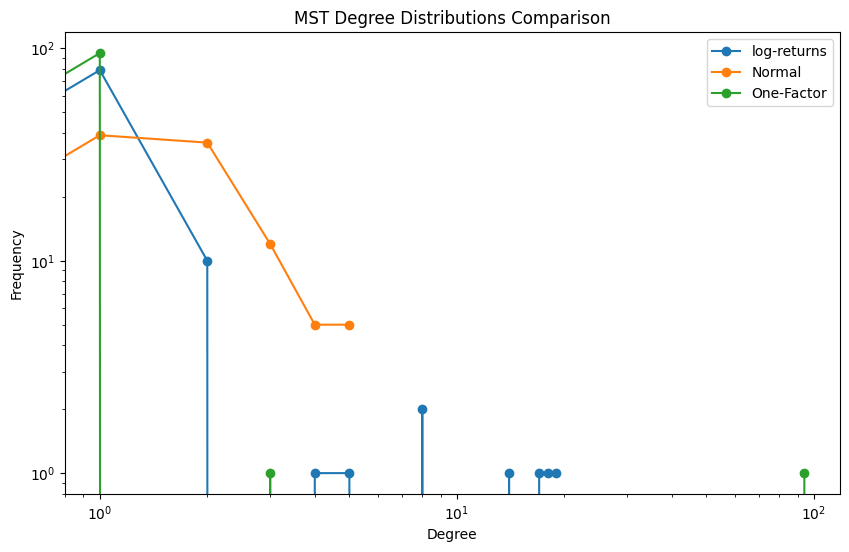

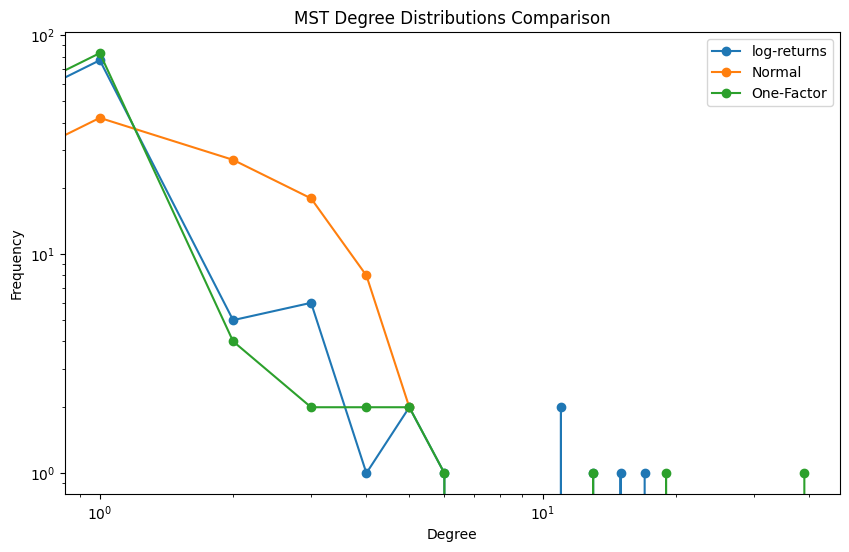

In [72]:
for time_scale in degree_dists:
    plot_log_log_mst_degree_distribution(time_scale, labels, title)